# Predicting if the passenger will survive on the Titanice

Import libraries

In [2]:

import numpy as np   # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
# Load the data

titanic = sns.load_dataset('titanic')

In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
# Count the number of rows and columns in the dataset
titanic.shape

(891, 15)

In [6]:
# Get some statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Get the number of passenger who survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Visualization

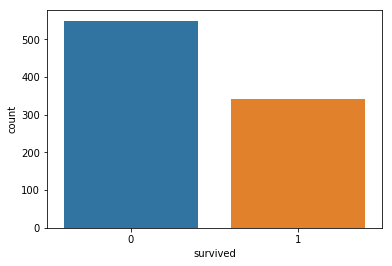

In [8]:
# Visualized number of survivors
sns.countplot(titanic['survived'])

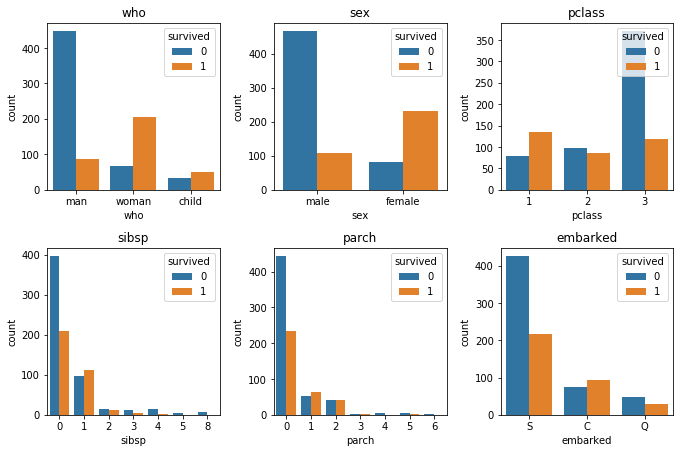

In [9]:
# Visualize the count of survivors for column 'who' , 'sex' , 'pclass' , 'sibsp' , 'parch' , ' embarked'

cols=['who' , 'sex' , 'pclass' , 'sibsp' , 'parch' , 'embarked']

n_rows = 2
n_cols = 3

# The subplot grid(توری) and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *3.2, n_rows * 3.2))

for r in range (0, n_rows):
    for c in range (0,n_cols):
        i = r * n_cols + c    # index to go through the number of columns
        ax = axs[r][c]         # show where the position each subplot
        sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax=ax)
        
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()


In [10]:
# Look at survival rate by sex

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [11]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [13]:
# Look survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


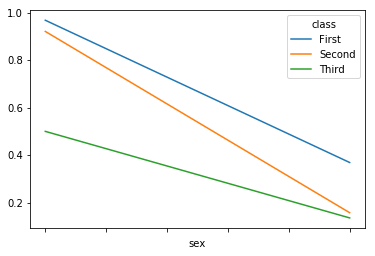

In [15]:
# Look at survival rate by sex and class visually

titanic.pivot_table('survived', index='sex', columns='class').plot()

C:\Users\azade\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


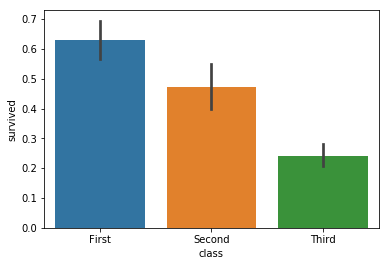

In [22]:
# plot the survival rate of each class

sns.barplot(x='class', y='survived', data= titanic)

In [24]:
# Look ate survival rate by sex, age and class

age =pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

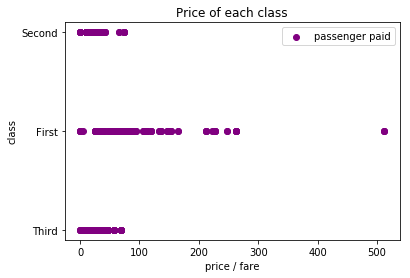

In [51]:
# Plot the prices paied by each class
plt.scatter(titanic['fare'], titanic['class'], label='passenger paid', color='purple')

plt.xlabel('price / fare')
plt.ylabel('class')

plt.title('Price of each class')
plt.legend()   # legend a small rectangle on the right-top of the table
plt.show()

In [54]:
# Count the empty values of each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [89]:
# Look at all values in each column & get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp,

In [100]:
# Drop the columns
my_df = titanic.drop(['alive','embark_town', 'class', 'who', 'adult_male', 'deck','alone'], axis = 1)

my_df.shape

(891, 8)

In [101]:
# Remove the row with the missing values
my_df =my_df.dropna(subset =['embarked','age'])

# Count the new number fo rows and columns
my_df.shape

(712, 8)

In [105]:
# Look at the date types
my_df.dtypes


survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [107]:
# Print the unique values and the columns
print(my_df['sex'].unique())
print(my_df['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [109]:
# For transforming our subject data to the number data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column       2 because sex is located in second row (0,1,2)
my_df.iloc[:,2] =labelencoder.fit_transform(my_df.iloc[:,2].values)

# Encode the embarket column      
my_df.iloc[:,7] =labelencoder.fit_transform(my_df.iloc[:,7].values)


print(my_df['sex'].unique())
print(my_df['embarked'].unique())

[1 0]
[2 0 1]


In [110]:
# split the data into independent X and dependent Y variables

# we are starting from one because "survived" is the y variable and we finishing by 8 since python caculating till 7
X = my_df.iloc[:, 1:8].values  
Y = my_df.iloc[:, 0].values

In [112]:
# Split the dataset into 80%training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [113]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Machine Learning Models

In [ ]:


# Create the function with machine learning models
def models(X_train,Y_train):
    # use logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    
    # use Kneighbors 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    
    # use Support Vector Classifier (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    # Use svc(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    # Use Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    
    # Use decision tree 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0) # معیار=(واحد اندازهگیری ترمودینامیک)آنتروپی
    tree.fit(X_train, Y_train)
    
    
    # Use the Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    # print the training accuracy for each mode  ( going to put the position of each mode , exp:for log is 0)
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]KNeighbors Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]svc Linear Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]svc RBF Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gauss Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Tree Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest 
    

In [146]:
# Get and train all of the models
model =models(X_train, Y_train) 


[0]Logistic Regression Training Accuracy: 0.7978910369068541
[1]KNeighbors Training Accuracy: 0.8664323374340949
[2]svc Linear Training Accuracy: 0.7768014059753954
[3]svc RBF Training Accuracy: 0.8506151142355008
[4]Gauss Training Accuracy: 0.8031634446397188
[5]Tree Training Accuracy: 0.9929701230228472
[6]Random Forest Training Accuracy: 0.9753954305799648


C:\Users\azade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy

In [152]:
# show the confusion matrix and accuracy for all of the model on the test data

from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    
    # Extract TN(true, negative), FP(false, positive), FN, TP values
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score= (TP+TN)/ (TP+ TN+ FP+ FN)
    
    print(cm)
    print('model[{}] testing accuracy="{}"'.format(i,test_score))
    print()                         



[[75  7]
 [19 42]]
model[0] testing accuracy="0.8181818181818182"

[[67 15]
 [20 41]]
model[1] testing accuracy="0.7552447552447552"

[[70 12]
 [18 43]]
model[2] testing accuracy="0.7902097902097902"

[[75  7]
 [22 39]]
model[3] testing accuracy="0.7972027972027972"

[[69 13]
 [27 34]]
model[4] testing accuracy="0.7202797202797203"

[[54 28]
 [12 49]]
model[5] testing accuracy="0.7202797202797203"

[[73  9]
 [14 47]]
model[6] testing accuracy="0.8391608391608392"



In [161]:
# Get feature importance
forest = model[6]
importances = pd.DataFrame({'feature': my_df.iloc[:,1:8].columns, 'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending= False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


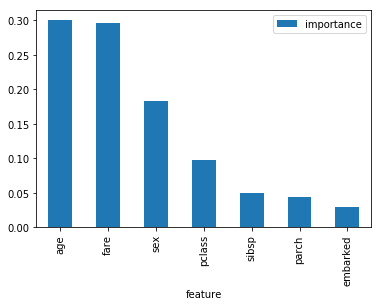

In [162]:
# Visualized the importance

importances.plot.bar()

In [165]:
# Print the perdiction of the random forest classifier

pred = model[6].predict(X_test)
print(pred)
print()

# Print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [184]:
# Make prediction on me , to know if I am likely to survived

#pclass        int64
#sex          object
#age         float64
#sibsp         int64
#parch         int64
#fare        float64
#embarked     object

# i wont be on the 1st class, so I chose the 3th class, I am female=0, age=40, i do not have sibling with me
# I do not have any childleren (parch=0), I do not want to pay(fare = 0), embarked(southampton=2)


# My survival
my_survival= [[3, 0, 40,0 ,0 ,0 ,2]]

#  Scaling my survival

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# Print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)

print(pred)
if pred ==0 :
    print('Oh No! You did not make it')
else:
    print('Nice, You survived')



[0]
Oh No! You did not make it
